In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

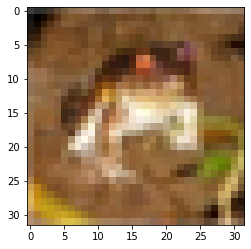

In [6]:
plt.imshow(X_train[0])
plt.show()

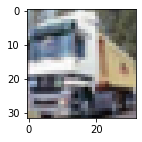

In [7]:
plt.figure(figsize=(12,2))
plt.imshow(X_train[1])
plt.show()

In [8]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

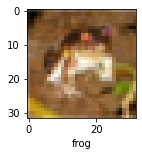

In [14]:
plot_sample(X_train,y_train,0)

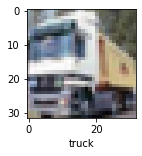

In [15]:
plot_sample(X_train,y_train,1)

In [16]:
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 138s 79ms/step - loss: 1.8121 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.6220 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.5415 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.4797 - accuracy: 0.4808
Epoch 5/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4313 - accuracy: 0.4951


In [20]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.4477 - accuracy: 0.4798


[1.447739601135254, 0.4797999858856201]

In [21]:
y_pred=ann.predict(X_test)
y_pred[0]

313/313 [==============================] - 6s 19ms/step


array([0.35202408, 0.68550074, 0.7620901 , 0.90399235, 0.32162833,
       0.7959324 , 0.6625789 , 0.05070554, 0.55743444, 0.15866211],
      dtype=float32)

In [22]:
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[0]

3

In [23]:
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.52      0.55      1000
           1       0.53      0.71      0.61      1000
           2       0.29      0.55      0.38      1000
           3       0.33      0.43      0.37      1000
           4       0.57      0.21      0.30      1000
           5       0.41      0.37      0.39      1000
           6       0.60      0.41      0.49      1000
           7       0.64      0.47      0.54      1000
           8       0.63      0.60      0.62      1000
           9       0.56      0.53      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



In [24]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [26]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 48s 28ms/step - loss: 1.5394 - accuracy: 0.4440
Epoch 2/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.1983 - accuracy: 0.5768
Epoch 3/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.0733 - accuracy: 0.6225
Epoch 4/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9947 - accuracy: 0.6513
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9375 - accuracy: 0.6729
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8912 - accuracy: 0.6888
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8601 - accuracy: 0.6985
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8313 - accuracy: 0.7083
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7954 - accuracy: 0.7198
Epoch 10/10
1563/1563 [==============================] - 43s 27m

In [27]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 8ms/step - loss: 0.9377 - accuracy: 0.6799


[0.9377307891845703, 0.6798999905586243]

In [28]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [29]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

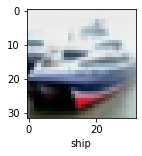

In [30]:
plot_sample(X_test,y_test,1)

In [31]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[7.1042194e-04, 2.2987617e-05, 8.9323748e-04, 8.8729233e-01,
        2.2829020e-04, 6.9387861e-02, 2.9329485e-03, 8.6680266e-05,
        3.8346674e-02, 9.8615252e-05],
       [2.3938215e-04, 6.9926167e-03, 8.3408349e-07, 8.2427101e-07,
        2.7410531e-08, 2.7215732e-09, 2.2081967e-09, 1.4221312e-09,
        9.9265492e-01, 1.1129289e-04],
       [2.8571438e-02, 3.1922773e-02, 2.8904141e-03, 2.8813209e-03,
        8.0454344e-04, 2.1313023e-04, 1.0032107e-04, 4.2235781e-04,
        9.2577487e-01, 6.4188042e-03],
       [8.2385969e-01, 4.1789338e-02, 9.1473330e-03, 1.1246493e-03,
        2.9307988e-03, 5.7318801e-05, 1.1025559e-03, 6.1792944e-06,
        1.1753126e-01, 2.4508333e-03],
       [2.6959522e-05, 8.7669605e-06, 8.9788690e-02, 2.2650380e-02,
        4.0605733e-01, 2.6578156e-03, 4.7860214e-01, 1.5460193e-04,
        4.8202659e-05, 5.1418906e-06]], dtype=float32)

In [32]:
np.argmax([5,12,1,2])

1

In [33]:
np.argmax([5,12,167,2])

2

In [34]:
np.argmax(y_pred[0])

3

In [35]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [37]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

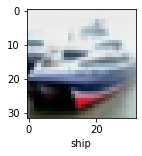

In [38]:
plot_sample(X_test,y_test,1)

In [39]:
classes[y_classes[1]]

'ship'

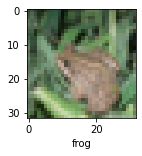

In [40]:
plot_sample(X_test,y_test,4)

In [41]:
classes[y_classes[4]]

'frog'

In [42]:
print('Classification Report: \n', classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.78      0.81      0.79      1000
           2       0.55      0.60      0.58      1000
           3       0.46      0.64      0.53      1000
           4       0.70      0.52      0.60      1000
           5       0.68      0.45      0.54      1000
           6       0.76      0.75      0.76      1000
           7       0.80      0.73      0.76      1000
           8       0.72      0.84      0.78      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

